# Car plates detection

In [1]:
import data_preparation as dp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2 as cv
import layers

In [2]:
import os
os.getcwd()

'C:\\Users\\ewsze\\Desktop\\ALK_projects\\car-plates-detection'

## 1. Data preparation and visualization

### 1.1 Raw data

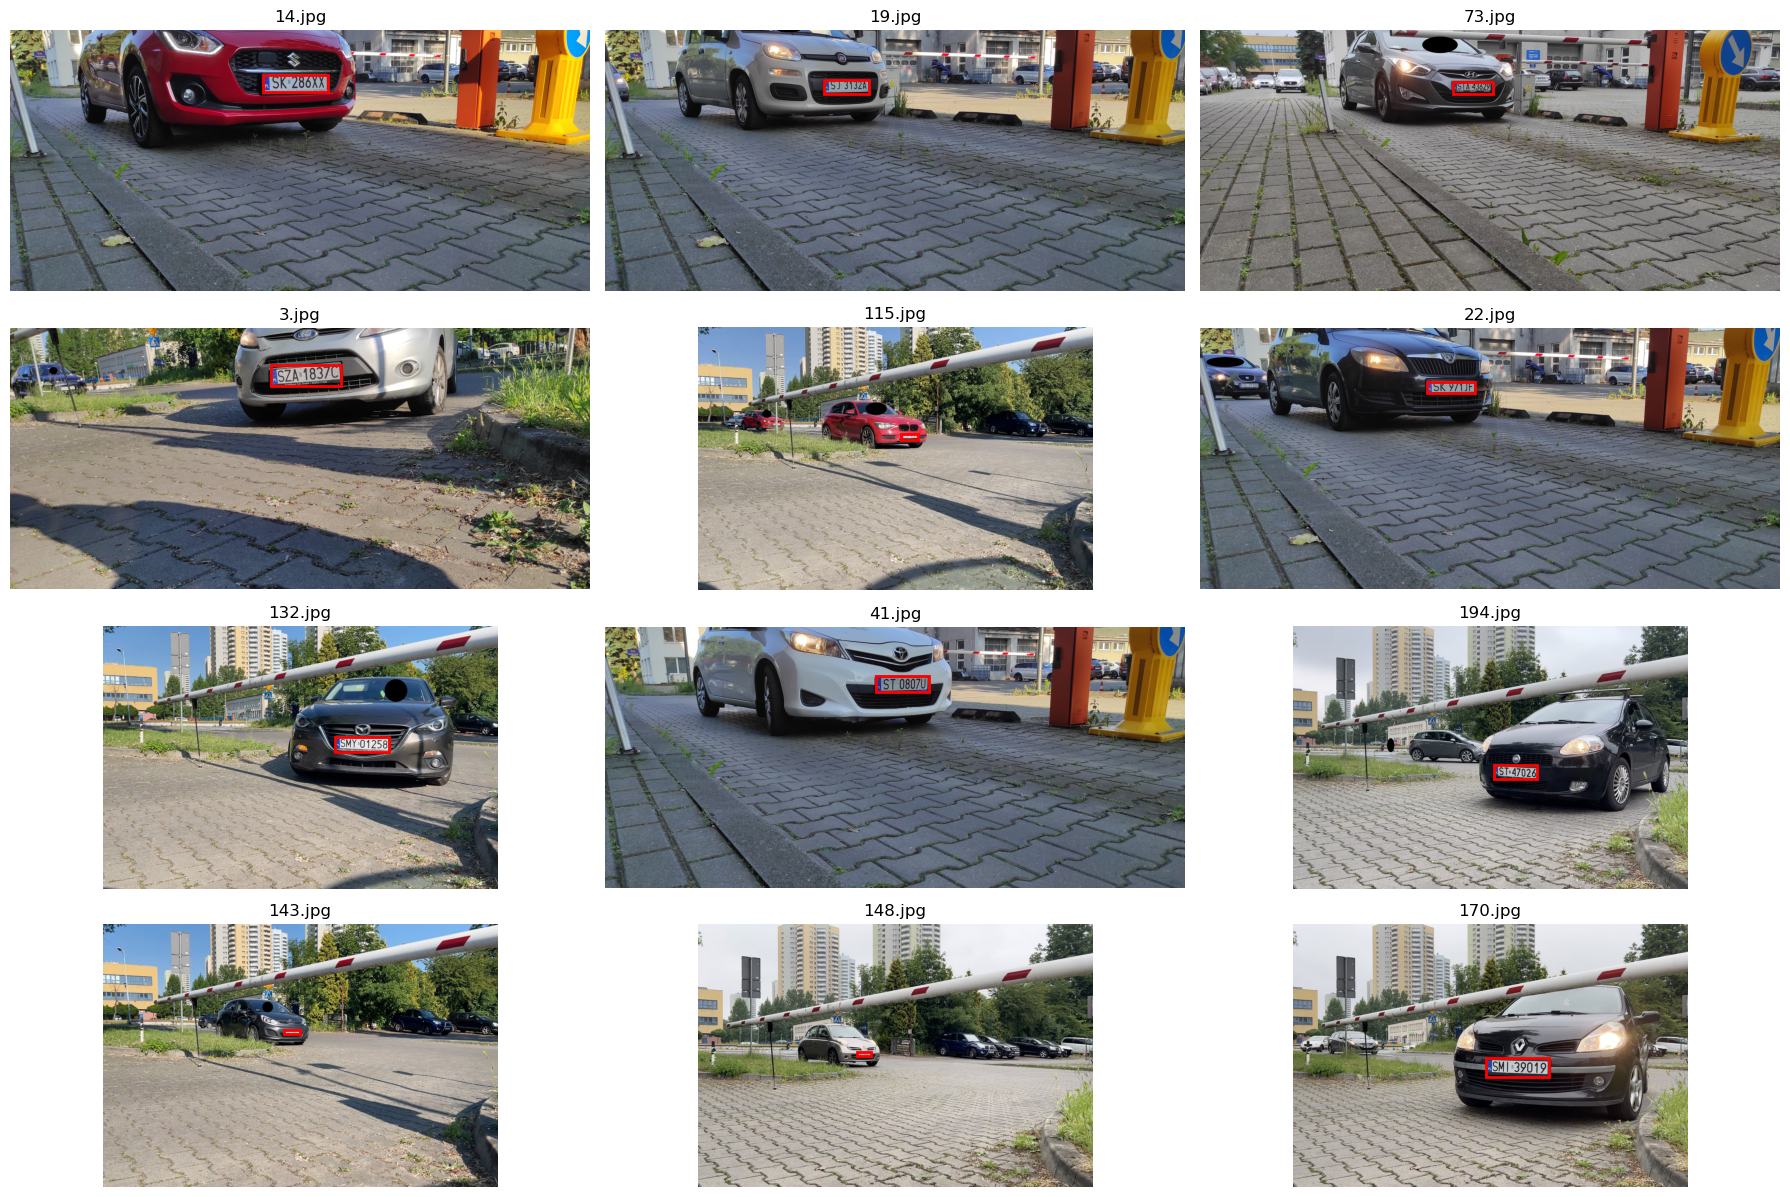

In [3]:
all_data = dp.data_list("./data/photos/")
dp.plot_images_with_bounding_boxes(all_data)

In [4]:
img = cv.imread(all_data[42]['X'])

In [5]:
img_array = np.array(img)
img_array

array([[[ 75,  45,  16],
        [ 72,  44,  14],
        [ 81,  57,  29],
        ...,
        [ 14,  11,   3],
        [ 12,   8,   3],
        [ 13,   9,   4]],

       [[ 84,  54,  25],
        [ 72,  44,  14],
        [ 65,  41,  13],
        ...,
        [ 52,  49,  41],
        [ 69,  65,  60],
        [ 79,  75,  70]],

       [[111,  79,  50],
        [101,  71,  42],
        [ 91,  65,  35],
        ...,
        [126, 123, 115],
        [145, 141, 136],
        [156, 152, 147]],

       ...,

       [[158, 173, 189],
        [162, 177, 193],
        [163, 178, 194],
        ...,
        [ 62,  61,  65],
        [ 66,  68,  69],
        [ 68,  70,  71]],

       [[142, 157, 173],
        [145, 160, 176],
        [149, 164, 180],
        ...,
        [ 63,  62,  66],
        [ 67,  69,  70],
        [ 74,  76,  77]],

       [[147, 162, 178],
        [144, 159, 175],
        [139, 154, 170],
        ...,
        [ 68,  67,  71],
        [ 70,  72,  73],
        [ 80,  82,  83]]

In [6]:
img_array.shape

(1524, 2284, 3)

### 1.2 Resizing images

In [7]:
new_width = 640
new_height = 400

all_data_resized = dp.img_set_size(all_data, new_width, new_height)

processing 39
processing 78
processing 117
processing 156
processing 195


In [8]:
len(all_data_resized)

195

### 1.3 Converting to grayscale

In [9]:
all_data_processed = dp.data_list_processed(all_data_resized)

In [10]:
all_data_processed[0]

{'X': array([[ 43,  48,  48, ..., 100,  92,  93],
        [ 41,  43,  52, ..., 100, 103, 104],
        [ 45,  44,  52, ..., 102,  97, 116],
        ...,
        [128, 112, 129, ..., 116, 125, 124],
        [126, 131, 128, ..., 129, 114, 122],
        [120, 119, 119, ...,  89,  80,  61]], shape=(400, 640), dtype=uint8),
 'Y': [0.4591379310344828,
  0.209477969348659,
  0.5258663793103449,
  0.25090996168582375],
 'original_size': (4640.0, 2088.0)}

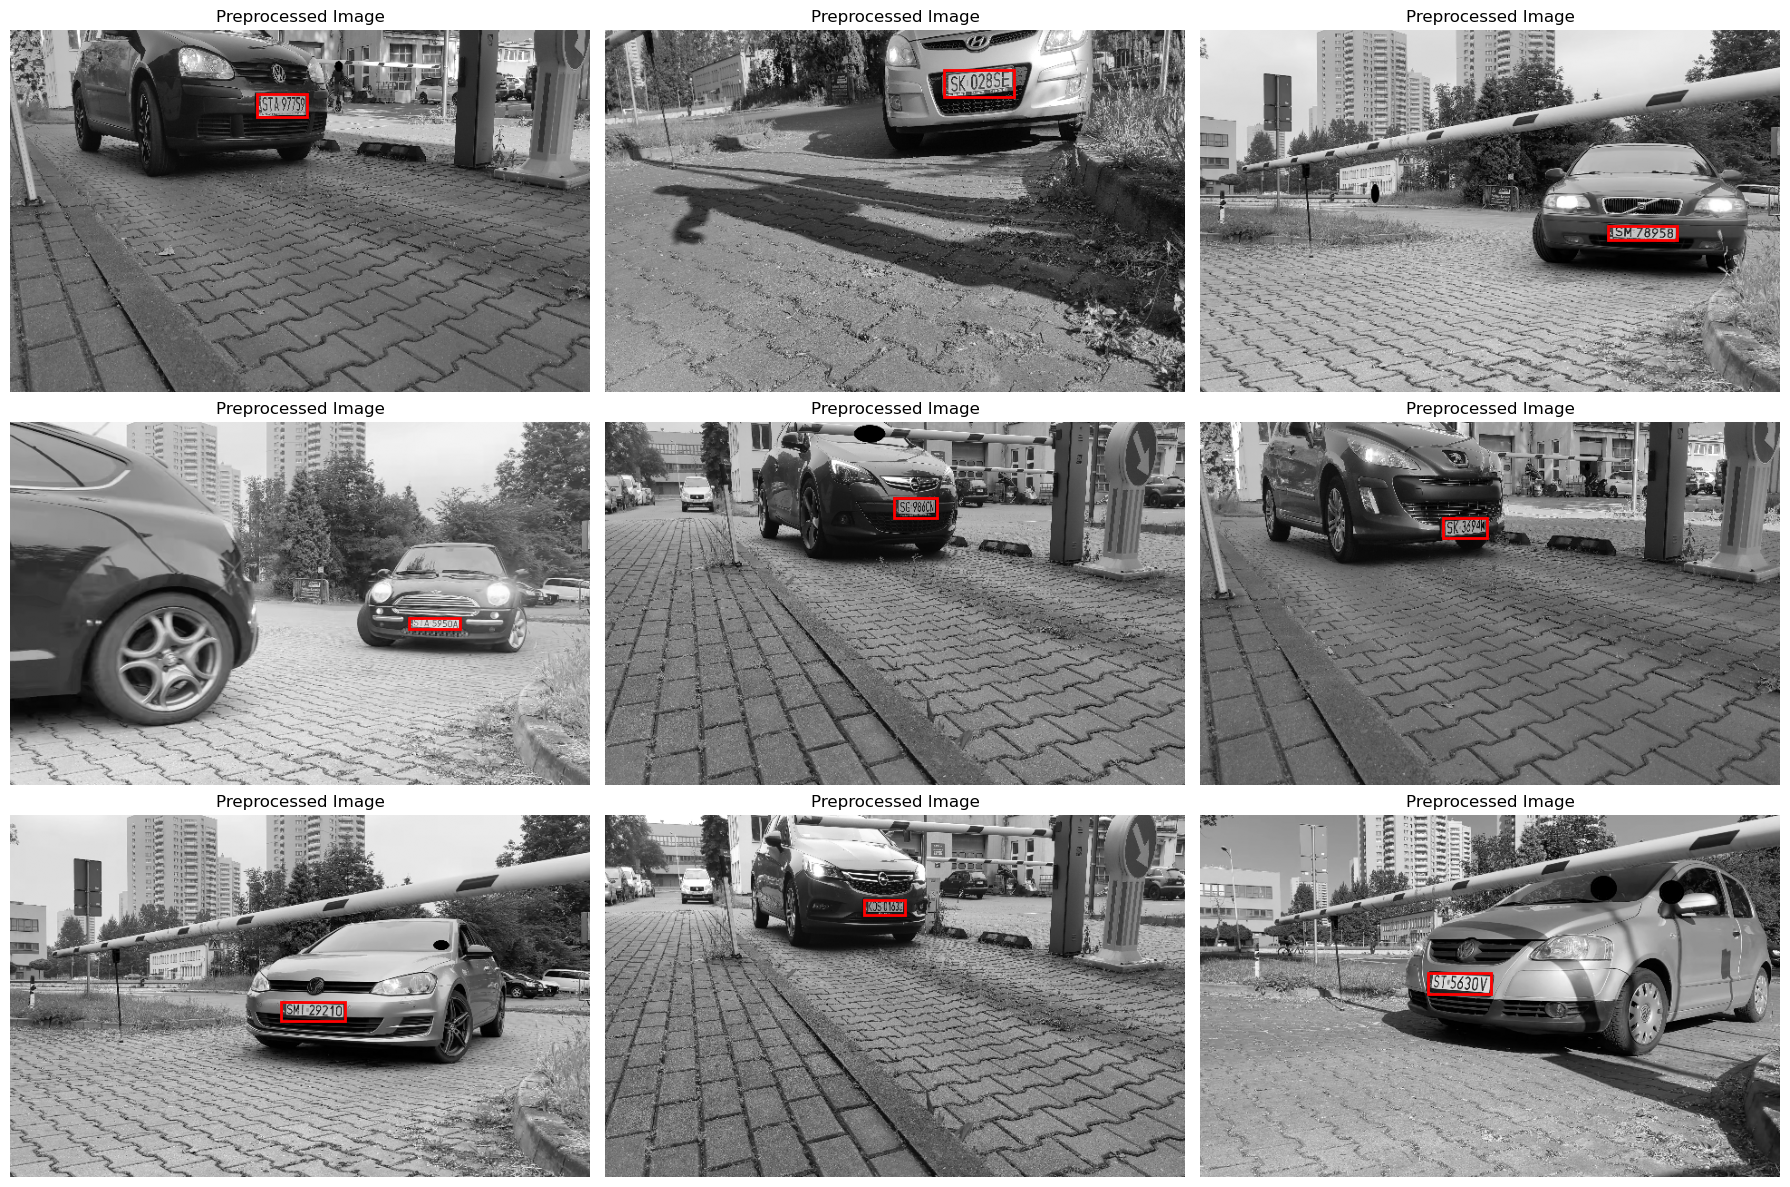

In [11]:
number_of_examples = len(all_data_processed)

fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(18,12))
axes = axes.flatten()
for ax in axes:
    idx = random.randint(0, len(all_data_processed) - 1)
    example = all_data_processed[idx]

    # Red bounding box
    xtl, ytl, xbr, ybr = map(float, example['Y'])
    xtl = xtl * new_width
    ytl = ytl * new_height
    xbr = xbr * new_width
    ybr = ybr * new_height    
    width = xbr - xtl
    height = ybr - ytl   
    rect = patches.Rectangle((xtl, ytl), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add rectangle to axis
    ax.add_patch(rect)
    
    ax.set_title("Preprocessed Image")
    ax.imshow(example['X'], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
type(all_data_processed)

list

In [13]:
X = np.array([example['X'] for example in all_data_processed])
Y = np.array([example['Y'] for example in all_data_processed])
print(f"Input feature (X): {X.shape}, target (Y): {Y.shape}")

Input feature (X): (195, 400, 640), target (Y): (195, 4)


In [14]:
all_data_processed[0]['X'].shape

(400, 640)

### 1.4 Normalize input data

In [15]:
X, Y, original_size = dp.normalize_data_input(all_data_processed)

Input feature (X): (195, 400, 640, 1), target (Y): (195, 4)


In [16]:
X[0]

array([[[0.16862746],
        [0.1882353 ],
        [0.1882353 ],
        ...,
        [0.39215687],
        [0.36078432],
        [0.3647059 ]],

       [[0.16078432],
        [0.16862746],
        [0.20392157],
        ...,
        [0.39215687],
        [0.40392157],
        [0.40784314]],

       [[0.1764706 ],
        [0.17254902],
        [0.20392157],
        ...,
        [0.4       ],
        [0.38039216],
        [0.45490196]],

       ...,

       [[0.5019608 ],
        [0.4392157 ],
        [0.5058824 ],
        ...,
        [0.45490196],
        [0.49019608],
        [0.4862745 ]],

       [[0.49411765],
        [0.5137255 ],
        [0.5019608 ],
        ...,
        [0.5058824 ],
        [0.44705883],
        [0.47843137]],

       [[0.47058824],
        [0.46666667],
        [0.46666667],
        ...,
        [0.34901962],
        [0.3137255 ],
        [0.23921569]]], shape=(400, 640, 1), dtype=float32)

### 1.6 Split data to train, test and validation set

In [17]:
X_train, Y_train, X_test, Y_test, X_val, Y_val, original_train, original_test, original_val = dp.data_split(X, Y, original_size)

Number of examples in train set: 137
Number of examples in test set: 29
Number of examples in validation set: 29


In [18]:
print(len(X_train), len(Y_train), len(X_test), len(Y_test), len(X_val), len(Y_val))

137 137 29 29 29 29


In [19]:
original_train[0]

(4640.0, 2088.0)

In [20]:
X_train.shape

(137, 400, 640, 1)

In [21]:
Y_train.shape

(137, 4)

In [22]:
X_train[0].shape

(400, 640, 1)

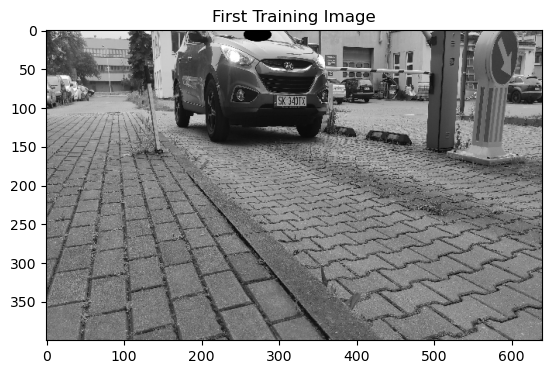

In [23]:
# X_train[0] shape (height, width, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title("First Training Image")
plt.show()

## 2. Forward propagation 

CNN structure:
1. Input (normalized images data) (batch_size, height, width, channels)
1. First Convolution:
    1. Convolutional layer
    2. ReLU Activation layer
    3. MaxPooling layer
2. Second Convolution:
    1. Convolutional layer
    2. ReLU Activation layer
    3. MaxPooling layer
3. Flattening
4. Fully Connected (Dense) layer
5. Output (xlt, ylt, xrb, yrb)

### 2.1 First Convolution

#### 2.1.1 Convolutional layer

In [24]:
conv = layers.Conv(8, 3)
conv_out = conv.forward(X_train[0:2])

Convolutional layer initialized.
Image patch shape: (3, 3, 1)
Filters shape: (8, 3, 3, 1)
Biases shape: (8,)
Image patch * kernel shape: (8, 3, 3, 1)
Output shape: (2, 398, 638, 8)


In [25]:
filter_0_map = conv_out[0, :, :, :]

In [26]:
filter_0_map.shape

(398, 638, 8)

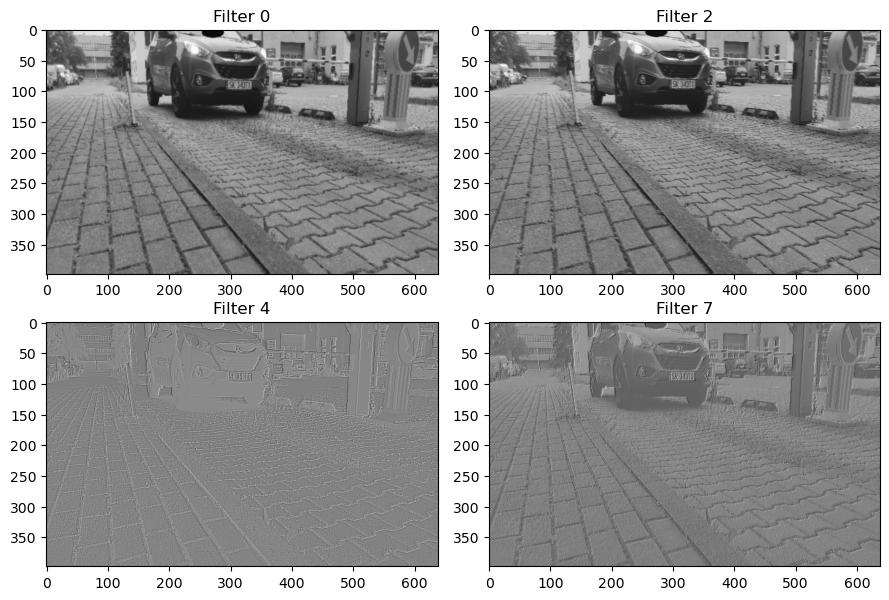

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 2, 4, 7]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(conv_out[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

#### 2.1.2 ReLU Activation

In [28]:
relu = layers.ReLU()
relu_out = relu.forward(conv_out)

ReLU activation initialized.


#### 2.1.3 MaxPooling layer

In [29]:
max_pool = layers.MaxPool(2)
max_pool_out = max_pool.forward(relu_out)

Max Pooling layer initialized.
Image patch shape: (2, 2, 8)
Output shape: (2, 199, 319, 8)


In [30]:
pool_filter_0_map = max_pool_out[0, :, :, :]
pool_filter_0_map.shape

(199, 319, 8)

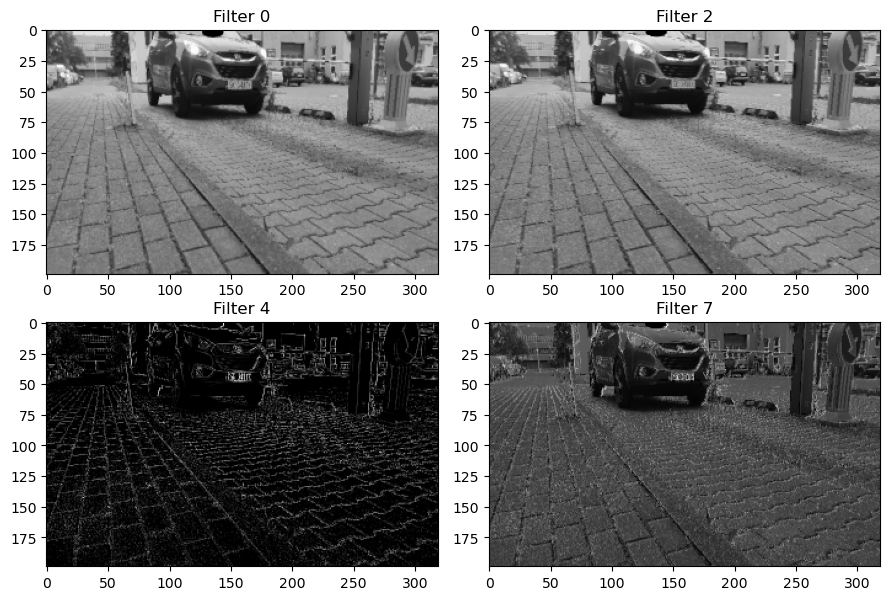

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 2, 4, 7]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(max_pool_out[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

### 2.2 Second Convolution

#### 2.2.1 Convolutional layer

In [32]:
conv2 = layers.Conv(16,3,8)

Convolutional layer initialized.


In [33]:
conv_out2 = conv2.forward(max_pool_out)

Image patch shape: (3, 3, 8)
Filters shape: (16, 3, 3, 8)
Biases shape: (16,)
Image patch * kernel shape: (16, 3, 3, 8)
Output shape: (2, 197, 317, 16)


#### 2.2.2 ReLU Activation

In [34]:
relu2 = layers.ReLU()
relu_out2 = relu2.forward(conv_out2)

ReLU activation initialized.


#### 2.2.3 MaxPooling layer

In [35]:
max_pool2 = layers.MaxPool(2)
max_pool_out2 = max_pool2.forward(relu_out2)

Max Pooling layer initialized.
Image patch shape: (2, 2, 16)
Output shape: (2, 98, 158, 16)


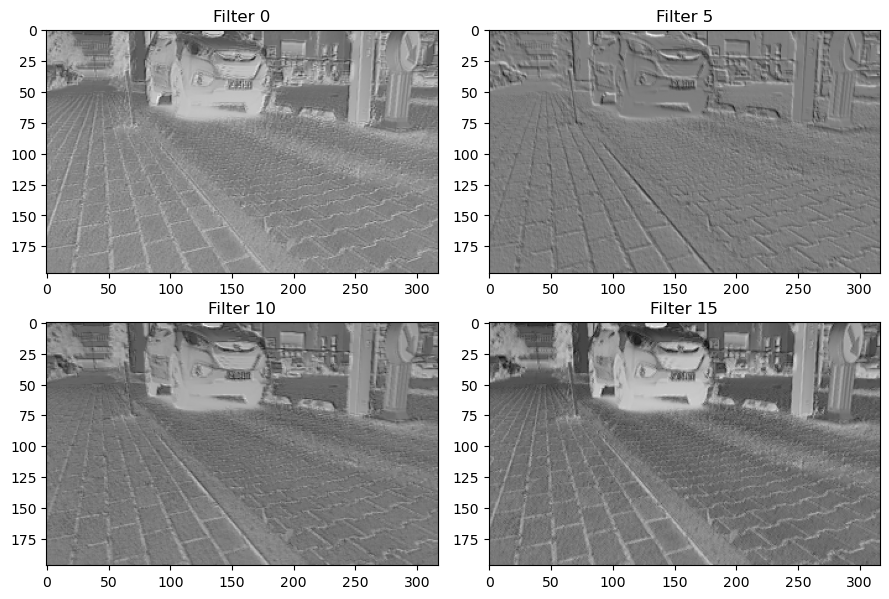

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 5, 10, 15]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(conv_out2[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

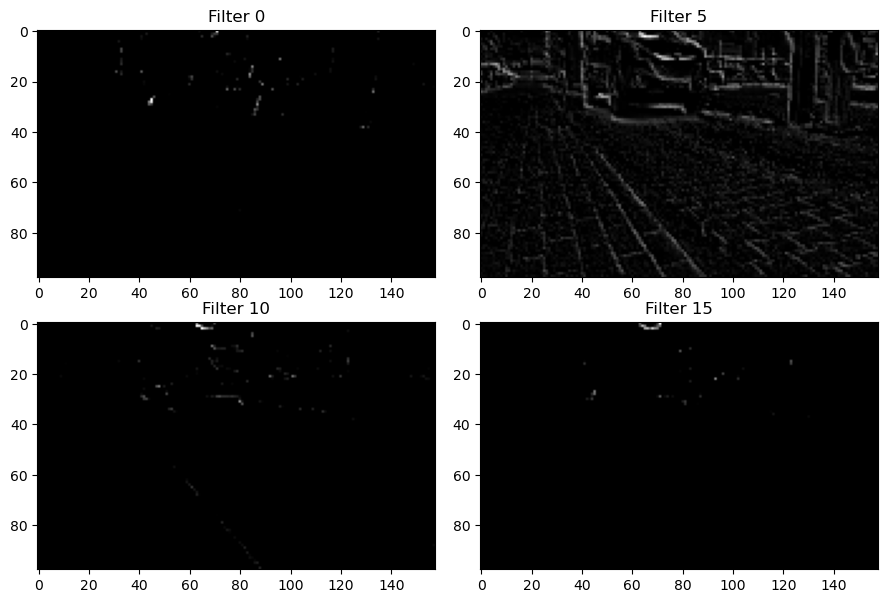

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 5, 10, 15]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(max_pool_out2[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

### 2.3 Flattening

In [38]:
flatten = layers.Flatten()
flat_out = flatten.forward(max_pool_out2)

Flattening layer initialized.
Output shape: (2, 247744)


In [39]:
flat_out.shape

(2, 247744)

In [40]:
flat_out[0, :20]

array([0.        , 0.21718082, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11659638, 0.07178225, 0.19558405,
       0.        , 0.10277874, 0.        , 0.18072422, 0.        ,
       0.        , 0.        , 0.31004469, 0.        , 0.        ])

### 2.4 Fully Connected (Dense)

In [41]:
fc = layers.FullyConnected(flat_out.shape[1], 4)

FullyConnected initialized: input_size=247744, output_size=4


In [42]:
fc_out = fc.forward(flat_out) 

FC output shape: (2, 4)


In [43]:
print("Predicted bbox values (normalized) for first element:", fc_out[0, :])

Predicted bbox values (normalized) for first element: [ -3.04739836  -0.73199828 -11.26694      4.04829301]


In [44]:
predicted_values = dp.output_array_tolist(fc_out[0, :])
predicted_values

[-3.0473983600994727,
 -0.7319982795158477,
 -11.266940002740787,
 4.048293008461451]

In [45]:
predicted_values2 = dp.output_array_tolist(fc_out[1, :])
predicted_values2

[-7.684112896372623, 0.6251690388147836, -7.064744262385097, 6.288266067087637]

#### 2.3.1 Resizing the output values (unnecesary now)

In [46]:
original_size = original_train[0]
original_size

(4640.0, 2088.0)

In [47]:
resized_bbox = dp.rescale_bbox(predicted_values, original_size)

In [48]:
resized_bbox

[-14139.928390861554, -1528.41240762909, -52278.601612717255, 8452.83580166751]

### 2.5 MSE Loss function

In [49]:
mse_loss = layers.MSELoss()

Mean Squared Error loss initialized.


In [50]:
loss = mse_loss.forward(Y_train[:2], fc_out)
grad = mse_loss.backward()
print(f"Loss: {loss}\nGrad: {grad}")

Loss: 41.29771115206157
Grad: [[-0.87663407 -0.23536906 -2.9482016   0.94934576]
 [-2.07939513  0.04217481 -1.95380538  1.44526862]]


Manual checking:

In [51]:
X_train[:1].shape

(1, 400, 640, 1)

In [52]:
Y_train[:1]

array([[0.45913792, 0.20947798, 0.5258664 , 0.25090995]], dtype=float32)

In [53]:
y_t = dp.output_array_tolist(Y_train[0])
y_t2 = dp.output_array_tolist(Y_train[1])
y_t, y_t2

([0.4591379165649414,
  0.2094779759645462,
  0.5258663892745972,
  0.2509099543094635],
 [0.6334676146507263,
  0.4564698040485382,
  0.7504772543907166,
  0.5071915984153748])

In [54]:
loss_man = (1 / 8) * (((y_t[0] - predicted_values[0]) ** 2) + ((y_t[1] - predicted_values[1]) ** 2) + ((y_t[2] - predicted_values[2]) ** 2) + ((y_t[3] - predicted_values[3]) ** 2)
                     + ((y_t2[0] - predicted_values2[0]) ** 2) + ((y_t2[1] - predicted_values2[1]) ** 2) + ((y_t2[2] - predicted_values2[2]) ** 2) + ((y_t2[3] - predicted_values2[3]) ** 2))
loss_man

41.29771115206157

In [55]:
grad_man = (2 / 8) * ((predicted_values[0] - y_t[0]))

In [56]:
print(f"xtl gradient value for X_train[0]: {grad_man}")

xtl gradient value for X_train[0]: -0.8766340691661035


Manual checking provided accuracy of output.

## 3. Backward propagation 

In [57]:
grad_fc = fc.backward(grad, 1)

In [58]:
grad_fc.shape

(2, 247744)

In [59]:
grad_flat = flatten.backward(grad_fc)

In [60]:
grad_flat.shape

(2, 98, 158, 16)

In [61]:
grad_maxpool2 = max_pool2.backward(grad_flat)

In [62]:
grad_maxpool2.shape

(2, 197, 317, 16)

In [63]:
grad_relu2 = relu2.backward(grad_maxpool2)

In [64]:
grad_relu2.shape

(2, 197, 317, 16)

In [65]:
grad_conv2 = conv2.backward(grad_relu2, 1)

In [66]:
grad_conv2.shape

(2, 199, 319, 8)

In [67]:
grad_maxpool = max_pool.backward(grad_conv2)

In [68]:
grad_maxpool.shape

(2, 398, 638, 8)

In [69]:
grad_relu = relu.backward(grad_maxpool)

In [70]:
grad_relu.shape

(2, 398, 638, 8)

In [71]:
grad_conv = conv.backward(grad_relu, 1)

In [72]:
grad_conv.shape

(2, 400, 640, 1)